<a href="https://colab.research.google.com/github/Akshat-Tripathi/AIHack20/blob/master/LSTMtraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compressor Analytics Dataset

Below are a few things to get you started with the Compressor Analytics dataset for AIHack! For more information see [here](https://drive.google.com/file/d/1ojYVHpabfkNz45nQqQLenyoaQbCmWdo4/view?usp=sharing).

In [1]:
# Download data - please only run this once
import urllib.request
import zipfile
import os

print("Starting download ...")
urls = [
    "https://github.com/aihack20/shell_challenge/releases/download/data/clean_dataset.zip",
    "https://github.com/aihack20/shell_challenge/releases/download/data/raw_dataset.zip",
]
os.makedirs("shell_data", exist_ok=True)
for url in urls:
    with urllib.request.urlopen(url) as src:
        with open("tmp.zip", "wb") as dest:
            dest.write(src.read())
    print("Unpacking archive ...")
    with zipfile.ZipFile("tmp.zip") as f:
        f.extractall("shell_data")
print("Done!")

Starting download ...
Unpacking archive ...
Unpacking archive ...
Done!


In [0]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Load the data (will take a short while)
clean_data = pd.read_csv("shell_data/clean_dataset.csv")
raw_data = pd.read_csv("shell_data/raw_dataset.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,2

## Your Hack ...

In [17]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
df = pd.DataFrame(clean_data.dropna())
# df = pd.DataFrame(clean_data)
heads = list(df)

hold = df.to_numpy()
df_shape = df.shape


In [0]:
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))
hold_norm = scaler.fit_transform(hold)

ts = 60


# nan_arr = np.argwhere(np.isnan(hold))
# hold_nom = hold_norm[~np.isnan(hold_norm).any(axis=1)]

# nan_arr

In [0]:
# A list of time periods (also a list) where is each element is a row of dataframe --> [[index]]
values = clean_data.values
last_index = 0
current_period = [0]
periods = []

for i in range(1,len(values)):
  if last_index == clean_data.iloc[i]['original_index'] - 1:
    current_period.append(i)
    last_index+=1
  else:
    periods.append(current_period)
    current_period = [i]
    last_index = clean_data.iloc[i]['original_index']

In [0]:
# getting all data for now, also for digital twin


goodc = []

for i in periods:
  if len(i) > ts:
    goodc.append(i[:-ts])


from itertools import chain
goodcc = list(chain.from_iterable(goodc))


x_all = np.empty([len(goodcc), ts, df_shape[1]])
y_all = np.empty([len(goodcc), df_shape[1]])


for i, j in enumerate(goodcc):
  y_all[i] = hold_norm[j+ts]
  for k in range(ts):
    x_all[i][k] = hold_norm[j+k]

train_len = math.ceil(len(y_all)*0.8)
x_train = x_all[:train_len]
y_train = y_all[:train_len]


In [21]:
solvers = ['adam','SGD','RMSprop','Adagrad','Adadelta','Adamax','Nadam']
losses = ['mean_squared_error','mean_absolute_error','mean_absolute_percentage_error',
          'mean_squared_logarithmic_error','squared_hinge','hinge','categorical_hinge',
          'logcosh','categorical_crossentropy',
          'binary_crossentropy', 'kullback_leibler_divergence','poisson','cosine_proximity']
          # 'is_categorical_crossentropy']  # ,'huber_loss','sparse_categorical_crossentropy
n = 0
tries  = [[] for i in range(len(solvers)*len(losses))]
# for x in solvers:
#   for y in losses:
#     tries[n] = [x,y,x+'-'+y]
#     n += 1

for y in losses:
  for x in solvers:
    tries[n] = [x,y,x+'-'+y]
    n += 1



[['adam', 'mean_squared_error', 'adam-mean_squared_error'], ['SGD', 'mean_squared_error', 'SGD-mean_squared_error'], ['RMSprop', 'mean_squared_error', 'RMSprop-mean_squared_error'], ['Adagrad', 'mean_squared_error', 'Adagrad-mean_squared_error'], ['Adadelta', 'mean_squared_error', 'Adadelta-mean_squared_error'], ['Adamax', 'mean_squared_error', 'Adamax-mean_squared_error'], ['Nadam', 'mean_squared_error', 'Nadam-mean_squared_error'], ['adam', 'mean_absolute_error', 'adam-mean_absolute_error'], ['SGD', 'mean_absolute_error', 'SGD-mean_absolute_error'], ['RMSprop', 'mean_absolute_error', 'RMSprop-mean_absolute_error'], ['Adagrad', 'mean_absolute_error', 'Adagrad-mean_absolute_error'], ['Adadelta', 'mean_absolute_error', 'Adadelta-mean_absolute_error'], ['Adamax', 'mean_absolute_error', 'Adamax-mean_absolute_error'], ['Nadam', 'mean_absolute_error', 'Nadam-mean_absolute_error'], ['adam', 'mean_absolute_percentage_error', 'adam-mean_absolute_percentage_error'], ['SGD', 'mean_absolute_perce

In [0]:


logtxt = F'/content/gdrive/My Drive/netlog/log.txt'
done = []
f = open(logtxt,'r')
for line in f:
  done.append(line)
f.close


for i,x in enumerate(tries):
  if x[2] not in done:

    print(str(i+1)+'/'+str(len(tries)))
    print(x[2])


    model = Sequential()
    model.add(LSTM(180, return_sequences=True, input_shape=(ts, df_shape[1])))
    model.add(LSTM(180, return_sequences=False))
    model.add(Dense(60))
    model.add(Dense(df_shape[1]))
    model.compile(optimizer=x[0], loss=x[1])

    history = model.fit(x_train, y_train, batch_size=1024, epochs=5, verbose=2, shuffle=True)

    loss = history.history['loss']


    netname = x[2]
    fileh5 = F'/content/gdrive/My Drive/nets/' + netname + '.h5'

    filetxt = F'/content/gdrive/My Drive/nets/' + netname+ '.txt'

    f = open(filetxt, 'w')
    # for i,j in enumerate(loss):
    #   f.write(str(i) + ' : ' + str(j) + '\n')
    f.write(str(loss))
    f.close

    f = open(logtxt,'a')
    f.write(x[2] + '\n')
    f.close


    model.save(fileh5)

# drive.flush_and_unmount()


1/91
adam-mean_squared_error
Epoch 1/5
 - 36s - loss: 0.0655
Epoch 2/5
 - 25s - loss: 0.0083
Epoch 3/5
 - 25s - loss: 0.0072
Epoch 4/5
 - 25s - loss: 0.0056
Epoch 5/5
 - 25s - loss: 0.0044
2/91
SGD-mean_squared_error
Epoch 1/5
 - 35s - loss: 0.4780
Epoch 2/5
 - 25s - loss: 0.4376
Epoch 3/5
 - 25s - loss: 0.3968
Epoch 4/5
 - 25s - loss: 0.3447
Epoch 5/5
 - 25s - loss: 0.2805
3/91
RMSprop-mean_squared_error
Epoch 1/5
 - 35s - loss: 0.0438
Epoch 2/5
 - 25s - loss: 0.0112
Epoch 3/5
 - 25s - loss: 0.0098
Epoch 4/5
 - 25s - loss: 0.0085
Epoch 5/5
 - 24s - loss: 0.0073
4/91
Adagrad-mean_squared_error
Epoch 1/5
 - 36s - loss: 0.0308
Epoch 2/5
 - 25s - loss: 0.0086
Epoch 3/5
 - 25s - loss: 0.0084
Epoch 4/5
 - 25s - loss: 0.0081
Epoch 5/5
 - 25s - loss: 0.0078
5/91
Adadelta-mean_squared_error
Epoch 1/5
 - 37s - loss: 0.0550
Epoch 2/5
 - 25s - loss: 0.0087
Epoch 3/5
 - 25s - loss: 0.0086
Epoch 4/5
 - 25s - loss: 0.0085
Epoch 5/5
 - 25s - loss: 0.0084
6/91
Adamax-mean_squared_error
Epoch 1/5
 - 37

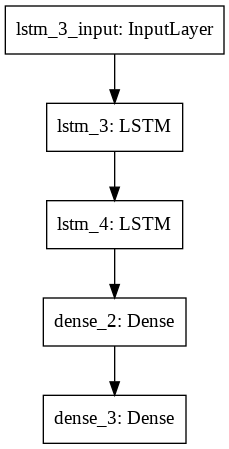

In [5]:
from keras.utils import plot_model
from keras.layers import LSTM, Dense
from keras.models import Sequential
model = Sequential()
model.add(LSTM(1000, return_sequences=True, input_shape=(60, 363)))
model.add(LSTM(1000, return_sequences=False))
model.add(Dense(600))
model.add(Dense(363))
# model.compile(optimizer=x[0], loss=x[1])
plot_model(model)